In [1]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import matplotlib.backends
from matplotlib.backends.backend_pdf import PdfPages
from sklearn import linear_model
import anndata as an
import scipy



In [2]:
# Enter the name of your input file here
inputFile = "seurat.txt"
# Input parameters
nGene = 200
nCell = 3

try:
    os.stat("ComplexityPlots")
except:
    os.mkdir("ComplexityPlots")
    
# Read in DGE Files    
fileNames = pd.read_csv(inputFile, sep = "\t")
fileNames

,Sample,DGE SilePath,Reads SilePath,Soup
0,Q1,L:/Duncan/CAR_AgSpreading/DGEs/Q1_20211028_DGE...,L:/Duncan/CAR_AgSpreading/DGEs/Q1_20211028_rea...,L:/Duncan/CAR_AgSpreading/DGEs/S1_20211028_sou...
1,Q2,L:/Duncan/CAR_AgSpreading/DGEs/Q2_20211028_DGE...,L:/Duncan/CAR_AgSpreading/DGEs/Q2_20211028_rea...,L:/Duncan/CAR_AgSpreading/DGEs/S1_20211028_sou...
2,Q3,L:/Duncan/CAR_AgSpreading/DGEs/Q3_20211028_DGE...,L:/Duncan/CAR_AgSpreading/DGEs/Q3_20211028_rea...,L:/Duncan/CAR_AgSpreading/DGEs/S1_20211028_sou...
3,Q4,L:/Duncan/CAR_AgSpreading/DGEs/Q4_20211028_DGE...,L:/Duncan/CAR_AgSpreading/DGEs/Q4_20211028_rea...,L:/Duncan/CAR_AgSpreading/DGEs/S1_20211028_sou...
4,Q5,L:/Duncan/CAR_AgSpreading/DGEs/Q5_20211028_DGE...,L:/Duncan/CAR_AgSpreading/DGEs/Q5_20211028_rea...,L:/Duncan/CAR_AgSpreading/DGEs/S1_20211028_sou...
5,R1,L:/Duncan/CAR_AgSpreading/DGEs/R1_20211028_DGE...,L:/Duncan/CAR_AgSpreading/DGEs/R1_20211028_rea...,L:/Duncan/CAR_AgSpreading/DGEs/S1_20211028_sou...
6,R2,L:/Duncan/CAR_AgSpreading/DGEs/R2_20211028_DGE...,L:/Duncan/CAR_AgSpreading/DGEs/R2_20211028_rea...,L:/Duncan/CAR_AgSpreading/DGEs/S1_20211028_sou...
7,R3,L:/Duncan/CAR_AgSpreading/DGEs/R3_20211028_DGE...,L:/Duncan/CAR_AgSpreading/DGEs/R3_20211028_rea...,L:/Duncan/CAR_AgSpreading/DGEs/S1_20211028_sou...
8,R4,L:/Duncan/CAR_AgSpreading/DGEs/R4_20211028_DGE...,L:/Duncan/CAR_AgSpreading/DGEs/R4_20211028_rea...,L:/Duncan/CAR_AgSpreading/DGEs/S1_20211028_sou...
9,R5,L:/Duncan/CAR_AgSpreading/DGEs/R5_20211028_DGE...,L:/Duncan/CAR_AgSpreading/DGEs/R5_20211028_rea...,L:/Duncan/CAR_AgSpreading/DGEs/S1_20211028_sou...


In [3]:
tic = time.time()
first = True
for i in range(0,fileNames.shape[0]):
        
    # read and print sample name
    sampName = str(fileNames.Sample.iloc[i])
    print(sampName)
        
    # read in DGE and readCounts files, calculate nUMI
    cells = pd.read_csv(fileNames.values[i,1], index_col = 0, header = 0, delim_whitespace = True)
    nUMIs = cells.sum(axis = 0)
    readCounts = pd.read_csv(fileNames.values[i,2], index_col = 0, header = 0, delim_whitespace = True)
    readCounts = readCounts.reindex(index = list(cells))
    cells = cells.loc[~cells.index.duplicated(),:]    
    cells
        
    # plotting 
    spam = plt.figure()
    plt.rcParams['figure.figsize'] = [7,8]
    plt.plot(readCounts['ExonReads'], nUMIs, 'ko')
    plt.xlabel('Total Reads')
    plt.ylabel('Number of UMIs')
    plt.title(str(sampName) + " Complexity")  
    regr = linear_model.LinearRegression()
    regr.fit(X = nUMIs.values.reshape(-1,1), y = readCounts['ExonReads'].values)
    plt.plot(X = nUMIs.values.reshape(-1,1), Y = regr.predict(nUMIs.values.reshape(-1,1)))
    c = np.array2string(regr.coef_[0])
    plt.annotate("Complexity = " + c, (0,plt.ylim()[1]*.95))
    plt.savefig(fname = "ComplexityPlots/" + str(sampName) + '.png')
    plt.close()
        
    # filter by nGene
    keepcells = (cells.values>0).sum(axis = 0) > nGene
    keepgenes = (cells.values > 0).sum(axis = 1) > nCell
    cells = cells.loc[keepgenes, keepcells]
        
    readCounts = readCounts[:][keepcells]
    n = cells.shape[1]

    # rename columns of data frame to prevent barcode collisions
    identsadd = [sampName]*n
    index = [identsadd[i] + "_" + str(i) for i in range(0, len(identsadd))]
    cells.columns = index
    bcs = readCounts.index.values
    print(len(bcs))
    
    if first:
        cellsAll = cells.copy()
        readCountsAll = readCounts.copy()
        bcsAll= bcs.copy()
        first = False
        idents_all = identsadd

    else:
        cellsAll = pd.DataFrame.join(cellsAll, cells, how = 'outer')
        readCountsAll = readCountsAll.append(readCounts)
        bcsAll = np.append(bcsAll, bcs)
        idents_all = np.append(idents_all, identsadd)
        
toc = time.time()
print(toc - tic)
cellsAll = cellsAll.fillna(0)
cellsAll = cellsAll.reset_index()



Q1
3934
Q2
6511
Q3
3688
Q4
5077
Q5
7216
R1
5707
R2
5694
R3
3066
R4
3709
R5
4697
R6
4796
R7
2071
R8
1112
R9
6047
R10
5437
1368.7222895622253


In [4]:
import pyarrow.feather
pyarrow.feather.write_feather(cellsAll, 'cellsAll.feather')  
pyarrow.feather.write_feather(readCountsAll, 'readCountsAll.feather')
np.savetxt('bcs.txt', bcsAll, fmt = "%s")

In [5]:
import sys
sys.path.append('../')
from functions import *

# read in and fix data
cells = pd.read_feather('cellsAll.feather')
cells.index = cells.loc[:, 'Gene']
cells = cells.drop('Gene', axis = 1)

filtered out 157 genes that are detected in less than 3 cells
filtered out 12156 cells that have less than 300 genes expressed
AnnData object with n_obs × n_vars = 56606 × 16882
    obs: 'orig', 'bc', 'n_genes'
    var: 'n_cells'
normalizing by total count per cell
    finished (0:00:10): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
extracting highly variable genes
    Gene indices [6663, 7013, 16824] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    finished (0:00:07)
regressing out n_counts


C:\Users\dmorgan\AppData\Local\Continuum\anaconda3\envs\seqwell\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig' as categorical
C:\Users\dmorgan\AppData\Local\Continuum\anaconda3\envs\seqwell\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'bc' as categorical


    finished (0:03:23)
linear scaling
computing PCA
    with n_comps=50
    finished (0:00:09)
    and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', the variance / eigenvalues (adata.uns)
    'pca_variance_ratio', the variance ratio (adata.uns)
computing neighbors
    computing neighbors
    using 'X_pca' with n_pcs = 10
    computed neighbors (0:01:14)
    computed connectivities (0:00:12)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:27)
computing UMAP


  0%|          | 0/200 [00:00<?, ?it/s]

    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:55)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:02:37)


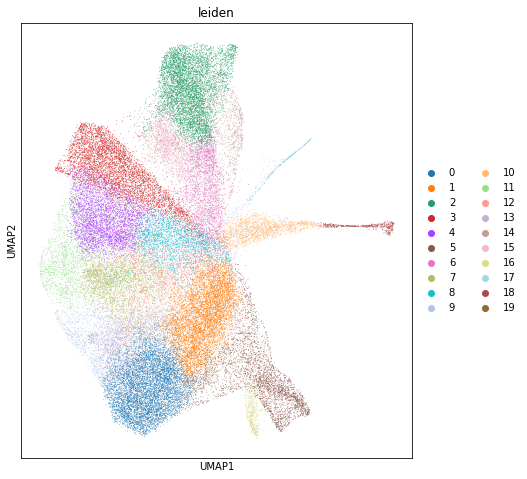

In [6]:
# SCANPY
sc.settings.verbosity = 4
adata = an.AnnData(cells.values.transpose())
adata.var_names = cells.index
adata.obs_names = cells.columns
bcs = np.loadtxt('bcs.txt', dtype = str)
adata.obs['orig'] =[x.split('_')[0] for x in adata.obs_names]
adata.obs['bc']= bcs
adata.obs_names_make_unique()
adata.var_names_make_unique()
adata
sc.pp.filter_genes(adata, min_cells = 3)
sc.pp.filter_cells(adata, min_genes = 300)
print(adata)

sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata

adata = process(adata)


running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:02:55)


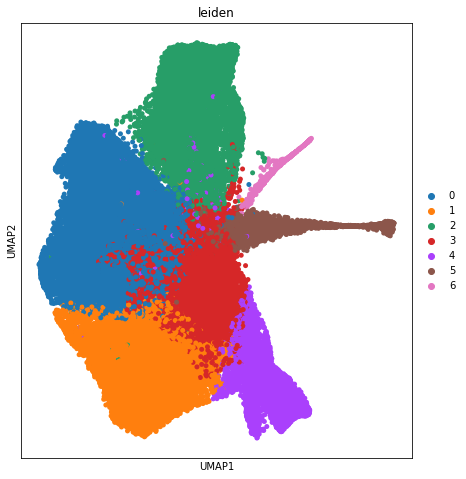

In [7]:
sc.tl.leiden(adata, resolution = .3)
sc.pl.umap(adata, color = 'leiden', size = 100)

In [8]:
getgenes(adata, ['5']).head(10)

,LogFC,pct1,pct2,pval,pval_adj
Gene,,,,,
Egfr,1.865695,0.408198,0.005584,1.029542e-238,1.054251e-235
Lamb1,1.595862,0.345431,0.003981,2.024807e-197,2.073402e-194
Col3a1,1.541121,0.332195,0.004091,2.569111e-183,2.630770e-180
Fn1,1.343874,0.269428,0.004957,1.057681e-140,1.083065e-137
Ctsl,1.214203,0.309564,0.012273,7.129491e-166,7.300599e-163
Ccnd1,1.213554,0.289496,0.010559,5.316504e-153,5.444101e-150
Cd63,1.119760,0.294620,0.009048,3.586475e-160,3.672550e-157
Spp1,0.942422,0.260888,0.030757,2.326480e-117,2.382315e-114
Myof,0.934196,0.225448,0.004312,4.639537e-118,4.750886e-115


In [9]:
getgenes(adata, ['6']).head(10)

,LogFC,pct1,pct2,pval,pval_adj
Gene,,,,,
Apoe,3.537759,0.509091,0.023181,1.927346e-56,1.817487e-53
Mpeg1,3.159218,0.822727,0.008279,1.041725e-138,9.823466e-136
H2-Ab1,3.013507,0.706818,0.032796,7.859231e-93,7.411255e-90
Cd74,2.916911,0.806818,0.120660,5.974172e-118,5.633644e-115
Lyz2,2.723572,0.420455,0.006819,4.787960e-47,4.515046e-44
C1qa,2.487655,0.409091,0.007211,9.862821e-47,9.300640e-44
Psap,2.418093,0.818182,0.379358,1.668976e-108,1.573844e-105
H2-Eb1,2.395111,0.602273,0.012321,2.412497e-73,2.274985e-70
C1qb,2.312122,0.409091,0.006783,4.087688e-47,3.854689e-44


In [ ]:
adata2 = removecluster(adata, ['5', '6'])

extracting highly variable genes
    Gene indices [6663, 7013, 16824] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    finished (0:00:09)
regressing out n_counts


In [ ]:
sc.tl.leiden(adata2, resolution = .3)
sc.pl.umap(adata2, color = 'leiden', size = 100)

In [ ]:
metadata = pd.read_csv('metadata.csv', index_col = 0)
adata2.obs['Treatment'] = metadata.Treatment.loc[adata2.obs.orig].values
adata2.obs['TimePoint'] = metadata.TimePoint.loc[adata2.obs.orig].values
adata2.obs.head()

In [ ]:
import pyarrow.feather
def seuratExport(adata, fname):
    df = pd.DataFrame(adata.raw.X.transpose())
    df.columns = adata.obs_names
    df.index = adata.raw.var_names
    df = df.reset_index()
    pyarrow.feather.write_feather(df, fname + '.feather') 
    adata.obs.to_csv(fname + '_meta.txt')
    
    
seuratExport(adata2, 'LMCarT')